# `20201108a` -- Experimenting with v0.2.6 of the lib 

#### Changes :

* Saving NDT acquisitions as in `fpga.stdNDTacq()`
* Processing those in `plot.readfile("20201107155232.npz")`

In [103]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import datetime
USB.__version__
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import datetime

from alaw import alaw_compress as ALAW

In [6]:
plot = USB.FView()
data = np.load("piezo1/20201108164611.npz") 

1 4093 16384


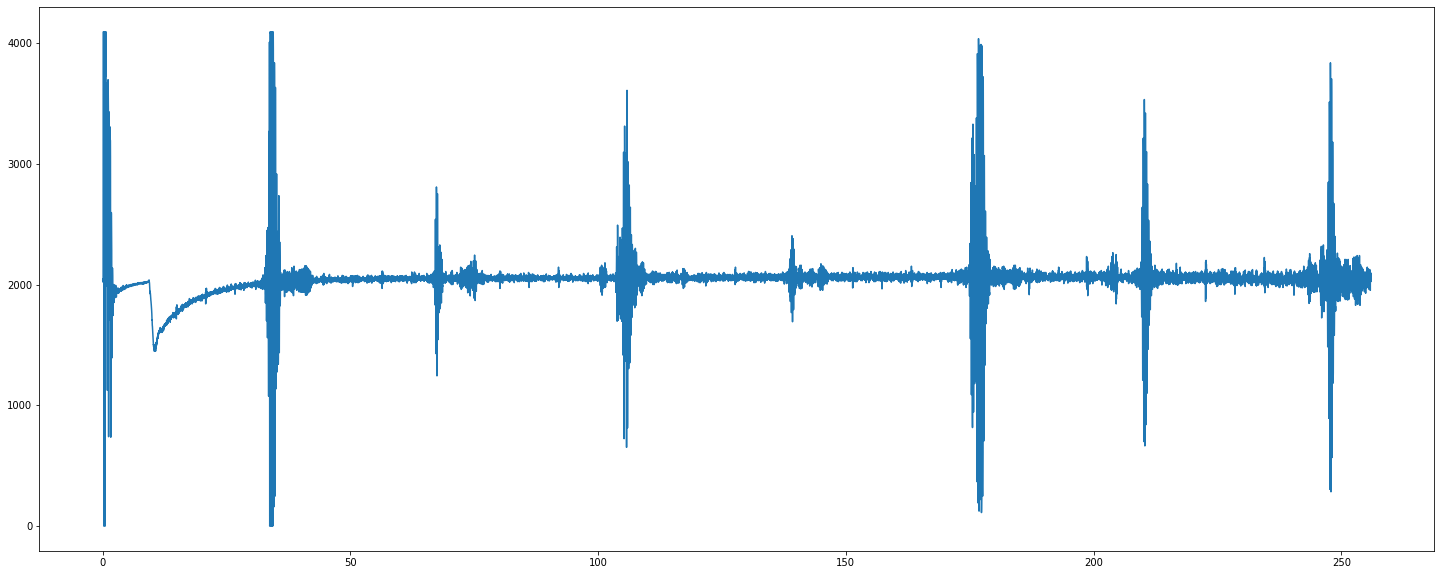

In [21]:
plt.figure(figsize=(25,10))
signal = [int(x*2048)+2049 for x in data["signal"][0] ]
plt.plot(data["t"],signal)
print(min(signal),max(signal),len(signal))

In [81]:
NPTs = 64
segSize = 16384 // NPTs

In [134]:
res = []
res2 = []
tt = []
for k in (range(NPTs)): 
    window = signal[k*segSize: (k+1)*segSize - 1]
    av = np.mean(window)
    pt = np.abs(window-av)
    pt1 = (np.abs(np.max(pt)))
    pt2 = np.abs(4*np.mean(pt))
    res.append(int(pt1))
    res2.append(int(pt2))
    tt.append((128/NPTs)*2.0*(k+0.5))
res = [np.abs(x - min(res)) for x in res]
al = [16*x for x in ALAW(res)]
 

1 4093 16384 0 2112


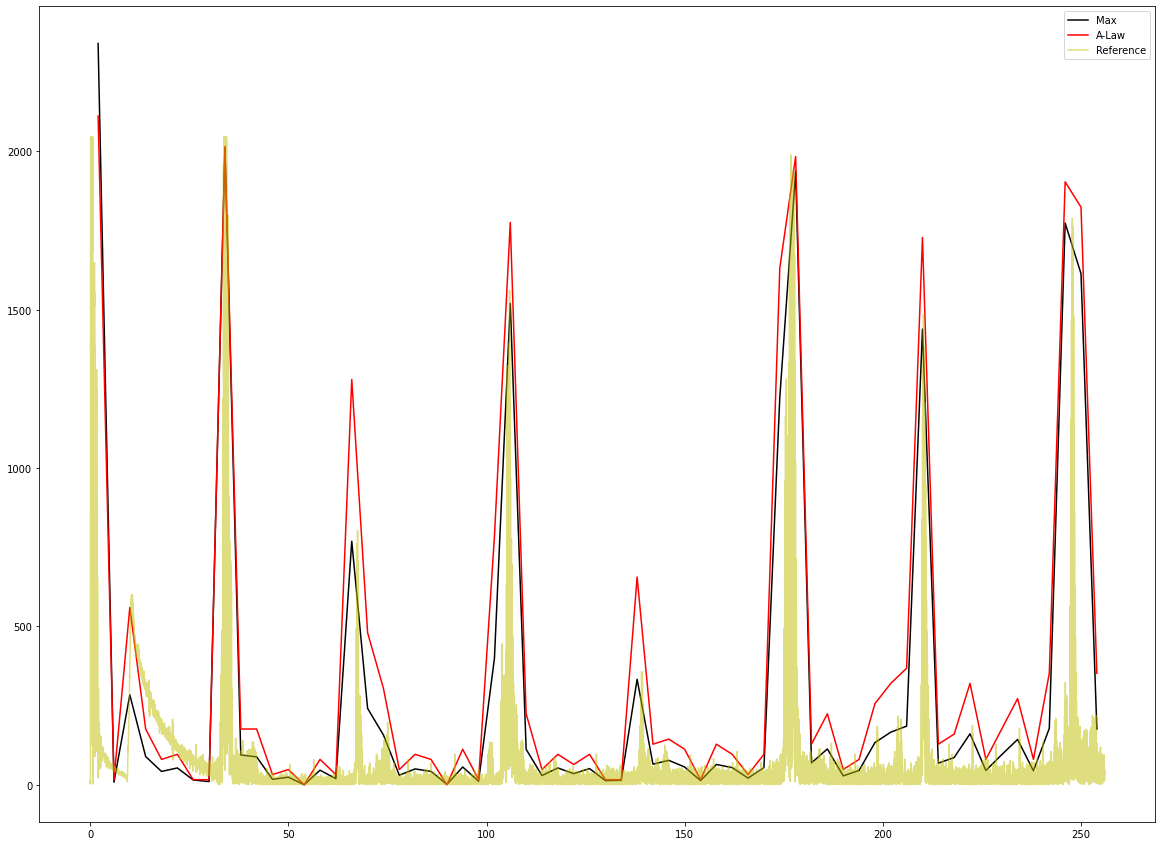

In [135]:
plt.figure(figsize=(20,15))
signal = [int(x*2048)+2049 for x in data["signal"][0] ]
plt.plot(tt,res,label="Max",color="k")
#plt.plot(tt,res2,label="Mean")
plt.plot(tt,al,label="A-Law",color="r")
plt.plot(data["t"],np.abs([x - 2048 for x in signal]),alpha=0.5,label="Reference",color="y")
plt.legend()
print(min(signal),max(signal),len(signal),min(al),max(al))